# Ex 03 Overfitting

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib
%matplotlib inline

## 1. Preprocessing

In [5]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=21)

In [10]:
y_train.value_counts()

dayofweek
3    313
6    287
1    222
5    216
2    125
0    105
4     80
Name: count, dtype: int64

In [11]:
y_test.value_counts()

dayofweek
3    83
6    69
5    55
1    52
0    31
4    24
2    24
Name: count, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [25]:
y_train.value_counts()

dayofweek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64

In [14]:
y_test.value_counts()

dayofweek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64

## 2. Baseline models

### logistic regression

In [26]:
logreg = LogisticRegression(fit_intercept=False, random_state=21)
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)

In [27]:
metrics.accuracy_score(y_test, log_pred)

0.6331360946745562

### SVC

In [28]:
clf = SVC(kernel='linear',probability=True, random_state=21)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, clf_pred)

0.7159763313609467

### decision tree

In [29]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
metrics.accuracy_score(y_test, tree_pred)

0.5295857988165681

### random forest

In [30]:
forest = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)
metrics.accuracy_score(y_test, forest_pred)

0.9289940828402367

* Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

random_forest

## 3. Crossvalidation

### logistic regression

In [ ]:
score = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print(f"Mean Accuracy: {np.mean(score)}")
print(f"Standard deviation: {np.std(score)}")

Mean Accuracy: 0.5815975677169707
Standard deviation: 0.025322132907253592


### SVC

In [38]:
score = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Mean Accuracy: {np.mean(score)}")
print(f"Standard deviation: {np.std(score)}")

Mean Accuracy: 0.6587064676616916
Standard deviation: 0.043585708770590564


### decision tree

In [39]:
score = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
print(f"Mean Accuracy: {np.mean(score)}")
print(f"Standard deviation: {np.std(score)}")

Mean Accuracy: 0.5088944168048645
Standard deviation: 0.031903139495514356


### random forest

In [40]:
score = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
print(f"Mean Accuracy: {np.mean(score)}")
print(f"Standard deviation: {np.std(score)}")

Mean Accuracy: 0.9176561636263129
Standard deviation: 0.02159583796321821


Best model: random forest

The worst model: decision tree

## 4. Optimization

The best and final model is RandomForestClassifier

In [42]:
rf = RandomForestClassifier(random_state=21)
param_grid = {
    'n_estimators': [50, 100, 200],        
    'max_depth': [None, 10, 20, 30]         
}

In [43]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [45]:
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [47]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [48]:
metrics.accuracy_score(y_test, y_pred)

0.9378698224852071

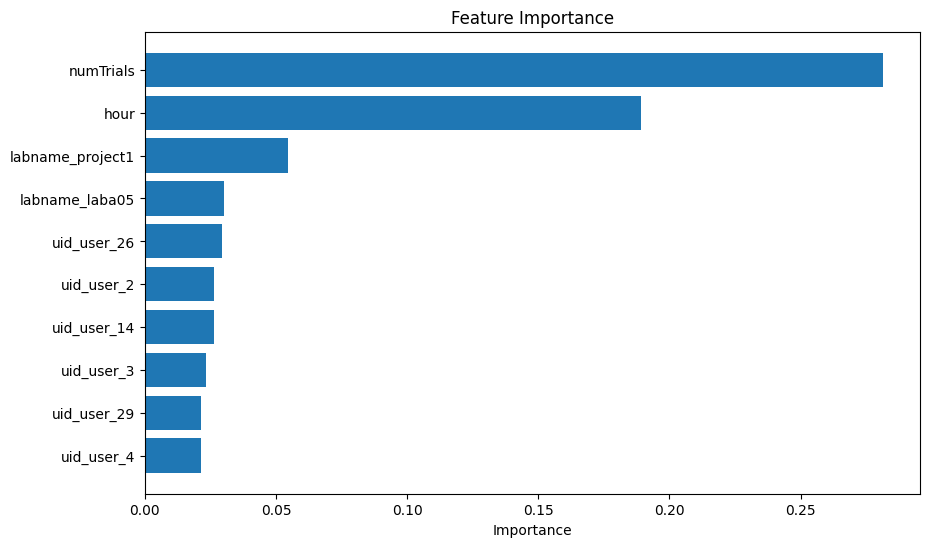

In [50]:
def plot_tree_importance(importances, feature_names, top_n=10):
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), importances[indices], align="center")
    plt.yticks(range(top_n), np.array(feature_names)[indices])
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.title('Feature Importance')
    plt.show()
plot_tree_importance(best_rf.feature_importances_, X.columns)

In [52]:
joblib.dump(best_rf, 'random_forest_model.joblib')
loaded_model = joblib.load('random_forest_model.joblib')

In [53]:
y_pred_loaded = loaded_model.predict(X_test)

In [54]:
metrics.accuracy_score(y_test, y_pred_loaded)

0.9378698224852071